<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/fundamentos_de_programacion/blob/main/clases/unidad3/7_chapter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/fundamentos_de_programacion/blob/main/clases/unidad3/7_chapter.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [1]:
import qrcode
from IPython.display import display
from PIL import Image

def generar_qr(url, version=1, box_size=4, border=4, fill_color="black", back_color="white"):
    """
    Genera y muestra un código QR para una URL dada en un Jupyter Notebook.
    
    Parámetros:
    - url: La URL para la cual generar el código QR
    - version: Tamaño del QR (1-40, donde 1 es el más pequeño)
    - box_size: Número de píxeles por cada "caja" del QR
    - border: Grosor del borde blanco alrededor del QR (en cajas)
    - fill_color: Color del código QR
    - back_color: Color de fondo del código QR
    
    Retorna:
    - Muestra el código QR directamente en el notebook
    - Retorna el objeto QR generado
    """
    # Configurar el generador de QR
    qr = qrcode.QRCode(
        version=version,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=box_size,
        border=border,
    )
    
    # Añadir la URL al QR
    qr.add_data(url)
    qr.make(fit=True)
    
    # Crear la imagen del QR
    img = qr.make_image(fill_color=fill_color, back_color=back_color)
     
    return img

# Ejemplo de uso:
# generar_qr("https://www.ejemplo.com")



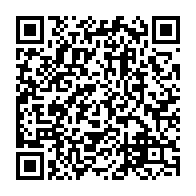

In [2]:
url = "https://colab.research.google.com/github/marco-canas/fundamentos_de_programacion/blob/main/clases/unidad3/7_chapter.ipynb"
generar_qr(url) 

### [Video de apoyo a la lectura interactiva y experimental de este cuaderno sobre el capítulo 7.]()

### [Vínculo al programa del curso de Fundamentos de Programación:](https://github.com/marco-canas/fundamentos_de_programacion/blob/main/programa/Programa_Fundamentos_Programacion.md)



## Código del curso: 314029

Un reconocimiento a mis estudiantes que han construido conmigo este saber pedagógico:

<img src = 'https://github.com/marco-canas/algebra_y_trigonometria/blob/main/7_images/5_clase_3_2025-08-12_hora_11_04.jpg?raw=true' width = 300> 



In [3]:
import pandas as pd
import numpy as np

# Cargar la lista de estudiantes desde el archivo CSV
path = 'C:/Users/marco/Documentos/docencia/groups_list/fundamentos_programacion.xlsx'
df = pd.read_excel(path)
df.index = np.arange(1, len(df) + 1)  # Cambiar el índice para que empiece en 1
df.head()


,Cédula,Nombre,Email
1,1038648096,ACEVEDO BELEÑO SANTIAGO,sacevedo.beleno@udea.edu.co
2,1038113597,CORREA RESTREPO NICOLAS,nicolas.crestrepo@udea.edu.co
3,1038648760,MARIN VILLARREAL PABLO ALEJANDRO,pablo.marin1@udea.edu.co
4,1038647828,NIEBLES BARRERA ALEXANDER ISAAC,alexander.niebles@udea.edu.co
5,1038136953,PATINO GIL CHRISTIAN FELIPE,christian.patino1@udea.edu.co



# Principios de mi labor docente

### Modelo general de clase: [aula invertida](https://www3.gobiernodecanarias.org/medusa/ecoescuela/pedagotic/aprendizaje-invertido-flipped-classroom/)

<img src = 'https://resources.maneuveringthemiddle.com/wp-content/uploads/2020/07/04212706/1-5.png' width = 200>  



### Metodología de Aprendizaje Basado en Problemas y Proyectos (ABPP) 



<img src = 'https://www.unir.net/wp-content/uploads/2020/07/aprendizaje-problemas2-1-1-1-1.jpeg' width = 200>

### Desarrollo del pensamiento computacional con Lenguajes Python y con archivos Markdown orientado a la formación en ciencia de datos 




<img src = 'https://i.ytimg.com/vi/mcG_wcR4e6M/maxresdefault.jpg' width = 200>

### Principio de fomento a la ciencia abierta, enseñar en el acceso a los datos públicos y el uso de software de código abierto  



<img src = 'https://unesdoc.unesco.org/in/rest/Thumb/image?id=p%3A%3Ausmarcdef_0000379949_spa&author=UNESCO&title=Recomendaci%C3%B3n+de+la+UNESCO+sobre+la+Ciencia+Abierta&year=2021&publisher=UNESCO&TypeOfDocument=UnescoPhysicalDocument&mat=PGD&ct=true&size=512&isPhysical=1' width = 100>

### El enfoque STEAMS 

### Y el enfoque de TRRS de Duval 


# CHAPTER 7



# Working with Files I/O in Python

*(Trabajar con Archivos E/S en Python – Enfoque para Matemáticas y Ciencia de Datos)*

---



## Introduction



En el capítulo anterior aprendimos a estructurar código mediante funciones y módulos, lo que permitió organizar mejor nuestras transformaciones matemáticas y modelos computacionales.



Sin embargo, en cualquier proyecto serio de matemáticas aplicadas o ciencia de datos surge una necesidad inevitable:

* Leer datos externos.
* Guardar resultados.
* Documentar experimentos.
* Exportar métricas.
* Construir pipelines reproducibles.



En investigación matemática y modelado computacional, los datos no viven solo en la memoria: viven en archivos.

Por ejemplo:

* Series temporales en archivos `.csv`
* Resultados experimentales en `.txt`
* Modelos serializados
* Reportes automáticos
* Logs de simulaciones



Trabajar con archivos es el paso que conecta:

> Pensamiento matemático → Modelado computacional → Ciencia de datos reproducible.



En este capítulo aprenderemos cómo abrir, leer, escribir y manipular archivos en Python con enfoque práctico.

---



## Structure

En este capítulo abordaremos los siguientes temas:

* Apertura de un archivo y sus modos
* Lectura de contenido desde archivos de texto
* Funciones importantes de E/S en Python
* Escritura de datos en archivos
* Manejo seguro de archivos (context manager)
* Trabajo con archivos CSV para ciencia de datos
* Organización de experimentos reproducibles

---



## Objectives

Al finalizar este capítulo, el estudiante será capaz de:

* Abrir archivos en distintos modos.
* Leer archivos de texto línea por línea o completamente.
* Escribir resultados y reportes en archivos.
* Comprender la diferencia entre modos de lectura, escritura y anexado.
* Manipular archivos CSV básicos sin depender completamente de librerías externas.
* Construir flujos simples de procesamiento de datos reproducibles.

---


# Creación de un archivo .txt de datos 

Empezaremos creando un archivo de datos artificial para aprender: 

* Qué es una serie temporal
* Cómo se generan datos artificiales
* Cómo se estructura un archivo `.txt`
* Cómo se documenta un proceso reproducible



La idea es que el archivo generado luego pueda usarse para:

* Leerlo
* Calcular media móvil
* Calcular estadísticas
* Aplicar filtros
* Hacer análisis posterior

---



# Script: Generación de datos artificiales en archivo `.txt`

Este script genera una serie temporal con:

* Tendencia lineal
* Componente estacional (seno)
* Ruido aleatorio

Y la guarda en un archivo `serie_artificial.txt`.



In [14]:
"""
Proyecto: Generación de Serie Temporal Artificial
Curso: Fundamentos de Programación – Matemáticas Puras
Descripción:
Se genera una serie temporal con tendencia, estacionalidad y ruido.
Los datos se guardan en un archivo .txt para posterior análisis.
"""

import numpy as np

# ==============================
# 1. Configuración del experimento
# ==============================

np.random.seed(123)  # Para reproducibilidad

n = 200              # Número de observaciones
t = np.arange(n)     # Índice temporal

# ==============================
# 2. Componentes de la serie
# ==============================

tendencia = 0.3 * t
estacionalidad = 10 * np.sin(2 * np.pi * t / 20)
ruido = np.random.normal(0, 2, n)

serie = tendencia + estacionalidad + ruido

# ==============================
# 3. Guardar datos en archivo .txt
# ==============================

with open("serie_artificial.txt", "w") as archivo:
    
    # Encabezado
    archivo.write("tiempo valor\n")
    
    # Escritura de datos
    for tiempo, valor in zip(t, serie):
        archivo.write(f"{tiempo} {valor:.4f}\n")

print("Archivo 'serie_artificial.txt' creado exitosamente.")


Archivo 'serie_artificial.txt' creado exitosamente.


# ¿Qué genera este archivo?

Ejemplo de salida en el `.txt`:

```
tiempo valor
0  -2.1713
1   3.8271
2   5.9104
3   9.8421
...
```

Columnas separadas por espacio (fácil de parsear).

---



# ¿Por qué este diseño es didácticamente potente?

Este script permite discutir:

1.  Tendencia (crecimiento estructural)
2.  Estacionalidad (componente periódico)
3.  Ruido (aleatoriedad)
4.  Reproducibilidad (`np.random.seed`)
5.  Escritura estructurada en archivo

---



# Versión más simple (si quieres algo más básico)

Para una clase inicial más sencilla:


In [17]:
import numpy as np

np.random.seed(42)

n = 100
datos = np.random.normal(0, 1, n)

with open("datos_simples.txt", "w") as archivo:
    archivo.write("indice valor\n")
    for i, valor in enumerate(datos):
        archivo.write(f"{i} {valor:.4f}\n")

print("Archivo creado.")


Archivo creado.



# Sugerencia pedagógica

Después de ejecutar el script, por favor:

1. Leer el archivo.
2. Separar columnas.
3. Calcular:

   * Media
   * Varianza
   * Media móvil
4. Graficar la serie.

---



# Opening a File in Python



Para abrir un archivo usamos la función:


In [ ]:
open(nombre_archivo, modo)


### Sintaxis general



In [ ]:
archivo = open("datos.txt", "r")



## 1. Modos de apertura

| Modo  | Significado             |
| ----- | ----------------------- |
| `"r"` | Lectura                 |
| `"w"` | Escritura (sobrescribe) |
| `"a"` | Anexar                  |
| `"x"` | Crear archivo nuevo     |
| `"b"` | Modo binario            |
| `"t"` | Modo texto              |

---



### Ejemplo 1 – Crear un archivo


In [16]:
archivo = open("ejemplo.txt", "w")
archivo.write("Curso de Fundamentos de Programación\n")
archivo.write("Trabajo con archivos en Python\n")
archivo.close()



### Ejercicio en clase

1. Cree un archivo llamado `teoremas.txt`.
2. Escriba tres teoremas fundamentales.
3. Cierre correctamente el archivo.

---



# 2. Reading a File

## 2.1 Leer todo el contenido


In [18]:
archivo = open("ejemplo.txt", "r")
contenido = archivo.read()
print(contenido)
archivo.close()


Curso de Fundamentos de Programación
Trabajo con archivos en Python



## 2.2 Leer línea por línea



In [ ]:
archivo = open("ejemplo.txt", "r")

for linea in archivo:
    print(linea.strip()) # strip() para eliminar el salto de línea al final de cada línea

archivo.close() # Cerrar el archivo después de su uso


Curso de Fundamentos de Programación
Trabajo con archivos en Python


## 2.3 readlines()



In [ ]:
archivo = open("ejemplo.txt", "r")
lineas = archivo.readlines()
archivo.close()

print(lineas)


### Ejercicio práctico

1. Cree un archivo con números (uno por línea).
2. Lea el archivo.
3. Calcule la suma total usando una función definida previamente.
4. Calcule la media.

---



# 3. Context Manager (Forma Recomendada)

En ciencia de datos debemos evitar errores por archivos abiertos.

Forma recomendada:

In [ ]:
with open("ejemplo.txt", "r") as archivo:
    contenido = archivo.read()
    print(contenido)


Ventaja:

* Se cierra automáticamente.
* Código más limpio.
* Menos errores.

---



### Ejercicio

Reescriba todos los ejemplos anteriores usando `with`.

---



# 4. Writing Results of Mathematical Computations

Supongamos que hacemos una simulación.


In [23]:
import numpy as np

datos = np.random.normal(loc = 0, scale = 1, size = 100)
media = np.mean(datos)
varianza = np.var(datos)
media, varianza 

(np.float64(0.10684012069730453), np.float64(0.7738189613515055))

Guardar resultados:


In [24]:
with open("resultados.txt", "w") as archivo:
    archivo.write(f"Media: {media}\n")
    archivo.write(f"Varianza: {varianza}\n")



### Tarea de afianzamiento

1. Simule 1000 datos normales.
2. Calcule:

   * Media
   * Varianza
   * Desviación estándar
3. Guarde resultados en archivo.
4. Añada fecha del experimento.

---



# 5. Working with CSV Files (Ciencia de Datos)

## 5.1 Crear un CSV manualmente


In [ ]:
with open("datos.csv", "w") as archivo:
    archivo.write("x,y\n")
    for i in range(5):
        archivo.write(f"{i},{i**2}\n")



## 5.2 Leer CSV manualmente



In [ ]:
with open("datos.csv", "r") as archivo:
    for linea in archivo:
        print(linea.strip().split(","))



## 5.3 Uso del módulo csv


In [ ]:
import csv

with open("datos.csv", newline='') as archivo:
    lector = csv.reader(archivo)
    for fila in lector:
        print(fila)



## Aplicación en Ciencia de Datos

Simulación de dataset:



In [ ]:
import csv
import numpy as np

with open("dataset_simulado.csv", "w", newline="") as archivo:
    escritor = csv.writer(archivo)
    escritor.writerow(["x", "y"])
    
    for i in range(100):
        x = np.random.uniform(0,10)
        y = 3*x + np.random.normal()
        escritor.writerow([x, y])



### Taller práctico

1. Lea el dataset.
2. Separe columnas.
3. Calcule correlación.
4. Guarde resultado en archivo nuevo.

---



# 6. Organización de Experimentos Reproducibles

Estructura sugerida:

```
proyecto/
│
├── datos/
│   └── dataset.csv
│
├── resultados/
│   └── metricas.txt
│
├── src/
│   └── analisis.py
```



Discusión:

* Reproducibilidad científica.
* Separación entre datos y código.
* Documentación automática.

---



# Proyecto Integrador

Construya un mini pipeline:

1. Genere datos.
2. Guárdelos en CSV.
3. Léalo nuevamente.
4. Calcule métricas.
5. Guarde reporte.
6. Organice carpetas.

---



# Tareas de Afianzamiento

## Nivel Conceptual

1. Explique la diferencia entre modo `"w"` y `"a"`.
2. ¿Por qué es importante cerrar un archivo?
3. ¿Qué riesgos hay al sobrescribir datos?

---



## Nivel Técnico

1. Cree una función que lea un archivo de números y retorne una lista de floats.
2. Cree una función que reciba una lista y escriba estadísticas en archivo.
3. Automatice el proceso completo.

---



## Nivel Ciencia de Datos

1. Simule una serie temporal de 200 puntos.
2. Guárdela en CSV.
3. Léala.
4. Calcule media móvil.
5. Guarde resultados en nuevo archivo.
6. Documente el proceso.

---



# Cierre Matemático

En matemáticas formales trabajamos con objetos abstractos.

En ciencia de datos trabajamos con:

* Representaciones discretas
* Datos persistentes
* Experimentos reproducibles

Dominar archivos en Python significa dar el paso de:

> Programas aislados → Proyectos científicos estructurados.

Y eso es formación matemática aplicada al mundo real.

---


# Ejemplo de forma de evaluación para esta capítulo  



## 10 Actividades Evaluativas – Working with Files I/O in Python

---



## 1. Evaluación conceptual escrita: Modos de apertura



### Objetivo

Comprender los modos de apertura de archivos y sus implicaciones.



### Actividad

Explique:

1. Diferencia entre `"r"`, `"w"`, `"a"` y `"x"`.
2. ¿Qué sucede si se abre un archivo inexistente en modo `"r"`?
3. ¿Por qué `"w"` puede ser peligroso en investigación científica?



## 2. Evaluación práctica básica: Crear y leer archivo

### Objetivo

Verificar dominio mínimo de E/S.

### Actividad (Computador sin internet)

1. Crear archivo `numeros.txt` con 10 números.
2. Leerlo.
3. Calcular la suma.
4. Imprimir resultado.



## 3. Evaluación técnica intermedia: Procesamiento estructurado

### Objetivo

Leer archivo estructurado y procesar datos.

Archivo dado:

```
1,4
2,5
3,6
```

### Actividad

1. Leer el archivo.
2. Separar columnas.
3. Calcular el producto interno.
4. Guardar resultado en `resultado.txt`.

### Modalidad recomendada

* Computador sin internet

### Criterios

* Parsing correcto (25%)
* Lógica matemática (25%)
* Escritura correcta del resultado (25%)
* Organización del código (25%)

---



## 4. Evaluación escrita de análisis de errores

### Objetivo

Comprensión profunda del flujo de archivos.

Se entrega código con errores:


archivo = open("datos.txt", "w")
contenido = archivo.read()
print(contenido)



### Actividad

1. Identifique errores.
2. Explique por qué ocurren.
3. Corrija el código.

### Modalidad

* Escrita

### Criterios

* Identificación correcta (50%)
* Argumentación técnica (50%)

---



## 5. Evaluación práctica: Simulación reproducible

### Objetivo

Construcción de pipeline simple.

### Actividad

1. Simular 100 datos normales.
2. Guardarlos en CSV.
3. Leerlos.
4. Calcular media.
5. Guardar reporte.



### Modalidad

* Computador sin internet



### Criterios

* Generación correcta (20%)
* Escritura CSV correcta (20%)
* Lectura correcta (20%)
* Cálculo correcto (20%)
* Organización estructural (20%)

---



## 6️. Evaluación conceptual avanzada: Reproducibilidad

### Objetivo

Comprensión epistemológica.

### Actividad escrita

Explique:

1. ¿Por qué separar datos y código?
2. ¿Cómo los archivos permiten reproducibilidad?
3. Riesgos de sobrescribir resultados.

### Modalidad

✔ Escrita

### Criterios

* Profundidad conceptual (50%)
* Coherencia argumentativa (30%)
* Conexión con práctica científica (20%)

---



## 7️. Evaluación práctica: Filtrado de datos

Archivo dado con valores numéricos.

### Actividad

1. Leer archivo.
2. Filtrar valores mayores a la media.
3. Guardarlos en nuevo archivo.

### Modalidad

✔ Computador sin internet

### Criterios

* Lectura correcta (25%)
* Cálculo de media (25%)
* Filtro correcto (25%)
* Escritura correcta (25%)

---



## 8️. Evaluación de diseño estructural

### Objetivo

Organización modular.

### Actividad

Crear estructura:

```
proyecto/
├── datos/
├── resultados/
├── src/
```

Crear script que:

1. Lea archivo desde `datos`
2. Procese
3. Guarde resultados en `resultados`



## 9️. Evaluación tipo parcial integrador (90 minutos)

### Escenario

Se entrega archivo CSV con:

* x
* y

### Actividad

1. Leer datos.
2. Ajustar modelo lineal simple manual.
3. Calcular error cuadrático medio.
4. Guardar informe con:

   * Parámetros
   * Error
   * Número de datos



### Modalidad

✔ Computador sin internet



### Rúbrica

| Criterio                | Peso |
| ----------------------- | ---- |
| Lectura correcta        | 20%  |
| Cálculo correcto        | 30%  |
| Escritura correcta      | 20%  |
| Organización y claridad | 30%  |

---



## Proyecto Final Corto (Evaluación mayor)



### Objetivo

Integrar E/S con modelado matemático.



# Actividad

1. Generar serie temporal.
2. Guardar.
3. Leer.
4. Calcular media móvil.
5. Guardar resultados.
6. Documentar proceso en comentarios.



# Actividad Integrada: Serie Temporal y Media Móvil

## Propósito formativo

Que el estudiante comprenda:

* Qué es una **serie temporal**.
* Qué es una **media móvil** desde el punto de vista matemático.
* Cómo implementar un pipeline completo:

  * Generación
  * Almacenamiento
  * Lectura
  * Transformación
  * Escritura de resultados
* Cómo documentar procesos reproducibles.

---



# 1️. ¿Qué es una serie temporal?

Una **serie temporal** es una sucesión ordenada de datos indexados por tiempo:

$$
x_1, x_2, x_3, \dots, x_n
$$



Ejemplos:

* Temperatura diaria
* Precio de una acción
* Número de casos de dengue por semana
* Producción mensual

En términos computacionales:

Es simplemente una lista ordenada cuyos índices representan tiempo.

---



# 2️. ¿Qué se entiende por media móvil?

La **media móvil (Moving Average)** es una transformación que suaviza una serie temporal.

Formalmente, dada una serie:

$$
x_1, x_2, x_3, \dots, x_n
$$



La media móvil de ventana $ k $ se define como:

$$
MA_t = \frac{1}{k} \sum_{i=t-k+1}^{t} x_i
$$



Es decir:

* Se toma un bloque de $ k $ valores consecutivos.
* Se calcula su promedio.
* Se desplaza la ventana.



### Interpretación matemática

La media móvil es:

* Un operador lineal
* Un suavizador
* Un filtro discreto
* Una convolución con un kernel uniforme



### Interpretación en ciencia de datos

Sirve para:

* Eliminar ruido
* Detectar tendencias
* Estabilizar variaciones
* Preprocesamiento antes de modelar

---



# Desarrollo completo de la actividad

---



# PASO 1 — Generar serie temporal

Simularemos una serie con tendencia + ruido.


In [4]:
import numpy as np

np.random.seed(42)

n = 100
tiempo = np.arange(n)

# Tendencia lineal + ruido
serie = 0.5 * tiempo + np.random.normal(0, 5, n)


- Discusión didáctica:

* `tiempo` es el índice temporal.
* `serie` representa el fenómeno observado.
* El ruido simula variabilidad real.

---



# PASO 2 — Guardar la serie en archivo CSV


In [5]:
with open("serie_temporal.csv", "w") as archivo:
    archivo.write("tiempo,valor\n")
    for t, valor in zip(tiempo, serie):
        archivo.write(f"{t},{valor}\n")


- Punto pedagógico:

* Se construye dataset reproducible.
* Separación clara entre generación y análisis.

---



# PASO 3 — Leer la serie desde archivo


In [6]:
tiempo_leido = []
serie_leida = []

with open("serie_temporal.csv", "r") as archivo:
    next(archivo)  # saltar encabezado
    
    for linea in archivo:
        t, valor = linea.strip().split(",")
        tiempo_leido.append(int(t))
        serie_leida.append(float(valor))


- Reflexión:

Aquí el estudiante comprende:

* Parsing
* Conversión de tipos
* Separación estructural de datos

---



# PASO 4 — Calcular la media móvil

Supongamos ventana $ k = 5 $.


In [7]:
def media_movil(datos, k):
    medias = []
    
    for i in range(k-1, len(datos)):
        ventana = datos[i-k+1:i+1]
        promedio = sum(ventana) / k
        medias.append(promedio)
        
    return medias



Aplicar:



In [8]:
k = 5
ma = media_movil(serie_leida, k)


- Explicación conceptual al estudiante:

* La primera media aparece en índice $ k-1 $.
* Se pierde información inicial.
* Se genera serie suavizada más corta.

---



# PASO 5 — Guardar resultados



In [9]:
with open("serie_suavizada.csv", "w") as archivo:
    archivo.write("tiempo,media_movil\n")
    
    for i in range(len(ma)):
        archivo.write(f"{tiempo_leido[i + k - 1]},{ma[i]}\n")


- Punto formativo:

Se aprende a:

* Ajustar índices
* Sincronizar tiempo con transformación

---



# PASO 6 — Documentar proceso

Ejemplo de documentación adecuada:


In [ ]:
"""
Proyecto: Suavizamiento de serie temporal
Autor: [Nombre del estudiante]
Descripción:
Se genera una serie temporal con tendencia lineal y ruido.
Posteriormente se calcula una media móvil de ventana k=5
para suavizar la serie y reducir variabilidad aleatoria.
Los resultados se guardan en un nuevo archivo CSV.
"""


- Enseñar que documentar no es decorar:
Es hacer ciencia reproducible.

---



# Visualización opcional (muy recomendada)



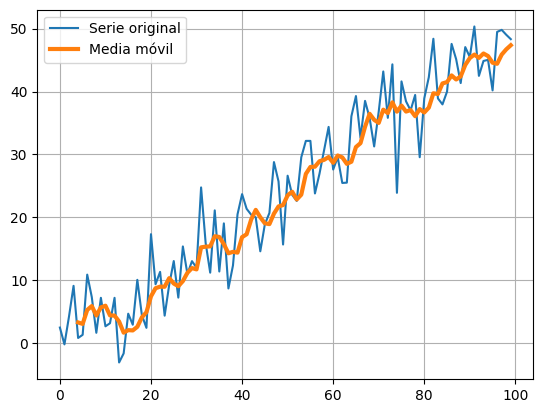

In [11]:
import matplotlib.pyplot as plt

plt.plot(tiempo_leido, serie_leida, label="Serie original")
plt.plot(tiempo_leido[k-1:], ma, label="Media móvil", linewidth=3)
plt.legend()
plt.grid()
plt.savefig(r"C:\Users\marco\Downloads\serie_suavizada.png")  # Guardar la figura como imagen
plt.show()



Aquí Vemos el suavizamiento.

---



# Discusión matemática profunda

Preguntas para clase:

1. ¿La media móvil es lineal?
2. ¿Qué ocurre si $k$ aumenta?
3. ¿Qué pasa con la varianza?
4. ¿Es invertible este operador?
5. ¿Es una forma de convolución?

---


# Respuestas posibles para la ciscusión anterior  



# Discusión Matemática Profunda — Media Móvil

Recordemos que la media móvil de ventana $k$ está definida por:

$$
MA_t = \frac{1}{k}\sum_{i=t-k+1}^{t} x_i
$$

Es decir, es un operador que transforma una sucesión $(x_t)$ en otra sucesión $(MA_t)$.

---



# 1️. ¿La media móvil es lineal?

### Respuesta: Sí, es un operador lineal.



### Demostración

Sea el operador $T$ definido por:

$$
T(x)*t = \frac{1}{k}\sum*{i=t-k+1}^{t} x_i
$$

Tomemos dos series $x$ y $y$, y un escalar $ \alpha$.



Verifiquemos:

$$
T(x + y)_t
$$

$$
= \frac{1}{k} \sum (x_i + y_i)
$$

$$
= \frac{1}{k} \sum x_i + \frac{1}{k} \sum y_i
$$

$$
= T(x)_t + T(y)_t
$$



Ahora:

$$
T(\alpha x)_t = \frac{1}{k} \sum \alpha x_i
$$

$$
= \alpha \frac{1}{k} \sum x_i
$$

$$
= \alpha T(x)_t
$$



✔ Cumple:

* Aditividad
* Homogeneidad

Por tanto, es un operador lineal.

---



- Interpretación avanzada:

Es un operador lineal en el espacio vectorial de sucesiones reales.

---



# 2️. ¿Qué ocurre si $k$ aumenta?

### Intuición

* Se promedian más valores.
* Se suaviza más la serie.
* Se pierde información de alta frecuencia.



### Matemáticamente

Al aumentar $k$:

* Se amplía la ventana de promedio.
* Se reduce la variabilidad local.
* Se incrementa el sesgo.
* Se reduce la resolución temporal.



En términos de frecuencia:

* Actúa como filtro pasa-bajas más agresivo.
* Elimina componentes de alta frecuencia.



- Compromiso clásico:

$$
\text{Mayor } k \Rightarrow \text{más suavizamiento pero menor capacidad de detectar cambios rápidos}
$$

---



# 3️. ¿Qué pasa con la varianza?

Supongamos que $x_t$ es ruido blanco con varianza $\sigma^2$.

La media móvil es:

$$
MA_t = \frac{1}{k}(x_t + x_{t-1} + \dots + x_{t-k+1})
$$



Si los $x_i$ son independientes:

$$
\text{Var}(MA_t)
=
\frac{1}{k^2}
\sum \text{Var}(x_i)
$$



$$
= \frac{k\sigma^2}{k^2}
= \frac{\sigma^2}{k}
$$



### Resultado clave:

$$
\text{Varianza disminuye proporcionalmente a } \frac{1}{k}
$$

- Conclusión didáctica:

La media móvil reduce la varianza.

Por eso suaviza.

---



# 4. ¿Es invertible este operador?

### En general, no es invertible.

¿Por qué?

Porque:

* Comprime información.
* Diferentes series pueden producir la misma media móvil.
* Se pierde información de alta frecuencia.

Formalmente:

Si $T(x) = T(y)$, no necesariamente $x = y$.



Ejemplo:

Oscilaciones rápidas pueden desaparecer tras el promedio.

Por tanto:

$$
T \text{ no es inyectivo}
$$

Y si no es inyectivo → no es invertible.

- Interpretación matemática profunda:

Es un operador lineal no invertible porque tiene núcleo no trivial.

---



# 5️. ¿Es una forma de convolución?

### Sí.

La media móvil es una convolución discreta.

Sea el kernel:

$$
h = \left( \frac{1}{k}, \frac{1}{k}, \dots, \frac{1}{k} \right)
$$



Entonces:

$$
MA_t = (x * h)_t
$$

Donde $ * $ es la convolución discreta:

$$
(x * h)*t = \sum*{j} x_{t-j} h_j
$$



En este caso, $h_j = \frac{1}{k}$ para $j=0,\dots,k-1$.

- Interpretación avanzada:

* Es una convolución con kernel rectangular.
* Es un filtro lineal e invariante en el tiempo.
* Es un operador de suavizamiento clásico en procesamiento de señales.

---



# Conexión con Matemáticas Avanzadas

Sin que los estudiantes lo noten explícitamente, aquí aparecen:

* Espacios vectoriales de sucesiones
* Operadores lineales
* Núcleo e imagen
* Convolución
* Filtros lineales
* Reducción de varianza
* Transformada de Fourier (en perspectiva futura)

---



# Pregunta extra para elevar el nivel

¿Qué pasa si el kernel no es uniforme?

Por ejemplo:

$$
\left(0.1, 0.2, 0.4, 0.2, 0.1\right)
$$

Aquí entran:

* Medias móviles ponderadas
* Suavizamiento gaussiano
* Filtros más sofisticados

---



# Resumen conceptual para tus estudiantes

| Pregunta                   | Respuesta breve                     |
| -------------------------- | ----------------------------------- |
| ¿Es lineal?                | Sí                                  |
| ¿Qué pasa si aumenta k?    | Más suavizamiento, menos resolución |
| ¿Qué pasa con la varianza? | Disminuye como $ \frac{1}{k} $      |
| ¿Es invertible?            | No                                  |
| ¿Es convolución?           | Sí                                  |

---



# Errores comunes que debes evaluar

* No ajustar índices correctamente.
* No convertir strings a float.
* No cerrar archivo.
* Usar mal la ventana.
* Confundir tamaño del resultado.

---



# Evaluación sugerida

## Modalidad ideal

Computador sin internet.

## Criterios

| Criterio                               | Peso |
| -------------------------------------- | ---- |
| Generación correcta                    | 15%  |
| Escritura correcta                     | 15%  |
| Lectura correcta                       | 20%  |
| Implementación correcta de media móvil | 30%  |
| Organización y comentarios             | 20%  |

---



# 🎓 Nivel matemático que se está formando

Esta actividad introduce implícitamente:

* Operadores lineales discretos
* Filtros
* Convolución
* Reducción de varianza
* Suavizamiento
* Preprocesamiento en ML

Sin decirlo explícitamente, estás preparando el terreno para:

* ARIMA
* Filtros de Kalman
* Deep Learning temporal
* Series temporales reales

---



###  Criterios

* Correctitud técnica (40%)
* Estructura reproducible (30%)
* Rigor matemático (20%)
* Claridad del código (10%)

---



# ¿Cómo evaluar? Modalidad recomendada

## Evaluación balanceada

| Tipo                | Modalidad               | Peso sugerido |
| ------------------- | ----------------------- | ------------- |
| Conceptual          | Escrita                 | 30%           |
| Técnica             | Computador sin internet | 50%           |
| Proyecto integrador | Computador sin internet | 20%           |

---



# ¿Por qué computador sin internet?

Ventajas:

* Evalúa pensamiento real.
* Evita copia de soluciones.
* Obliga a comprensión estructural.
* Simula entorno profesional controlado.
* Fomenta memoria operativa del lenguaje.

---



# Recomendación pedagógica estratégica

Para estudiantes de Matemáticas Puras:

* Las evaluaciones escritas miden comprensión formal.
* Las evaluaciones en computador miden operacionalización matemática.
* El proyecto mide pensamiento estructural.

La combinación de las tres produce evaluación integral.

---


### [Evaluamos al profesor Marco Cañas Aquí](https://forms.office.com/Pages/ResponsePage.aspx?id=IefhmYRxjkmK_7KtTlPBwkanXIs1i1FEujpsZgO6dXpUREJPV1kxUk1JV1ozTFJIQVNIQjY5WEY3US4u)

### Continue su aprendizaje en la siguiente clase a través del siguiente [vínculo](https://github.com/marco-canas/fundamentos_de_programacion/blob/main/clases/unidad3/8_chapter.ipynb)

# Horario de clases del profesor Marco

* Lunes 8-12:    
* Martes 9-11 M:  
* Martes 2 a 6 PM: Álgebra Lineal.   
* Miércoles 9 a 11 M:  
* Jueves 8 a 12 M: Funamentos de Programación
* Jueves 2 a 6 PM:    
* Viernes 8 - 12 M: Asesorías y espacio para retroalimentación y apoyo al trabajo independiente.    
* Sábados 8-12: PIVU Puerto Libertador.  

## Monitores  
* José Luis Guerrero Guerra: . 
* 

## Referentes 

[Libro guía Fundamentos de programación: Data Analysis with Python: Introducing NumPy, Pandas, Matplotlib, and Essential Elements of Python Programming (English Edition) [Kindle Edition]](https://read.amazon.com/?_encoding=UTF8&asin=B0BBB56L4X&consumptionLimitReached=false&deviceAccountIds=A1032123ZASLV79K77QP&hasMultimedia=false&requiredCapabilities=EBOK_PURCHASE_ALLOWED&ref=sr_rn_kfw) Este vínculo lo debo abrir con Chrome

* [Bergmann, J. (2012). *Flip Your Classroom.* (Aula Invertida).](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://blogs.ugto.mx/mdued/wp-content/uploads/sites/66/2022/11/Bergmann-y-Sams-Dale-la-vuelta-a-tu-clase.pdf)    
  


* [CALCULO I DE UNA VARIABLE Ron Larson-Bruce Edwards. Mc Graw Hill. 9º Edición](https://www.academia.edu/42139251/CALCULO_I_DE_UNA_VARIABLE_Ron_Larson_Bruce_Edwards_Mc_Graw_Hill_9o_Edici%C3%B3n)   
  


* [Métodos numéricos usando python](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://librosoa.unam.mx/bitstream/handle/123456789/3416/MNPython.pdf?sequence=1&isAllowed=y)  
  


* [Métodos numéricos usando python. Código fuente de todo el libro](https://github.com/jcjimenezb123/MNPython-Libro?tab=readme-ov-file#readme)



* [Grajales Vanegas, L. M., Restrepo Estrada, C. E., Restrepo Ochoa, S. I., & Ruíz De Villalba, F. (2015). Matemáticas I para las ciencias económicas.](https://bibliotecadigital.udea.edu.co/handle/10495/3010)
 

 
* R. Duval y Semiosis y pensamiento humano, 2.ª ed. Cali, Colombia: Programa Editorial Universidad del Valle, 2017. [En línea]. Disponible en: https://programaeditorial.univalle.edu.co/gpd-semiosis-y-pensamiento-humano-9789587655278-63324cdb0f6b3.html



* [Aylwin, C. U. (2011). Lógica, conjuntos y números. Universidad de los Andes, Consejo de Publicaciones, Colección: Ciencias Básicas, Serie: Matemáticas.](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.u-cursos.cl/ciencias/2011/1/MC110/1/material_docente/bajar?id_material=574722)
  


* [Chollet, F. (2021). Deep learning with Python. Simon and Schuster.](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://tanthiamhuat.wordpress.com/wp-content/uploads/2018/03/deeplearningwithpython.pdf)  
 

 
* [Watson, S., Stewart, J., & Redlin, L. (2009). Precálculo. Matemáticas para el cálculo.](https://github.com/marco-canas/calculo/blob/main/referents/1_precalculo_stewart/stewart_precalculo.pdf)  



* [Purcell, E. J., Varberg, D., & Rigdon, S. E. (2007). Cálculo diferencial e integral. Pearson Educación.](https://github.com/marco-canas/calculo/blob/main/referents/purcell/purcell_calculo.pdf)

 

 

* [stewart cálculo](https://udeaeduco-my.sharepoint.com/:b:/g/personal/marco_canas_udea_edu_co/EZgXZjAp8QxPqOAim2hs6LcBNPLGjSHf-xwYnUVYkwa04w?e=RZdTCy)  







* [Recomendación de la UNESCO sobre ciencia abierta](https://unesdoc.unesco.org/ark:/48223/pf0000379949_spa)



* [chatGPT](https://openai.com/blog/chatgpt)  



* [Géron, A. (2017). Hands-on machine learning with scikit-learn and tensorflow: Concepts. Tools, and Techniques to build intelligent systems.](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/http://14.139.161.31/OddSem-0822-1122/Hands-On_Machine_Learning_with_Scikit-Learn-Keras-and-TensorFlow-2nd-Edition-Aurelien-Geron.pdf)   



* [McKinney, W. (2012). Python for data analysis: Data wrangling with Pandas, NumPy, and IPython. " O'Reilly Media, Inc.".](https://wesmckinney.com/book/) 

# Como estudiante, encuentro que...   

F: Mis Fortalezas son:     
O: Mis Oportunidades son:    
D: Mis Debilidades son:    
A: Lo que Amenazas mi aprendizaje es:  

## Agradecimientos  

Doy gracias a Dios por la vida de mi Hijo Joseph Cañas Osorio y la madurez que ha alcanzado. Este hijo me enorgullece y me hace falta abrazarlo cada día. 

Y a mi esposa Yasmira Emperatriz Barboza Mogollón por su apoyo, orientación y acompañamiento. 

# Fundamentar Pedagógica y didácticamente mi propuesta de enseñanza  



# Referentes en Didáctica de las Matemáticas y Pensamiento Computacional



### 1. **Seymour Papert (1980, 1996)**

* Padre del **constructionism**, con su obra *Mindstorms* (1980).
* Plantea que la computadora no es solo una herramienta de cálculo, sino un **medio para pensar** y construir conocimiento matemático.
* Sostiene que programar permite a los estudiantes interactuar con conceptos matemáticos de manera experimental.
* Su lema central: *“Los niños no aprenden la matemática de las computadoras; aprenden matemáticas con las computadoras”*.
  - Esto respalda tu idea de usar Python, LaTeX y Markdown como lenguajes que median la construcción de significados matemáticos.

---



# 2. **Alan H. Schoenfeld (1985, 1992)**



* Destaca la importancia de la **resolución de problemas** en la enseñanza de las matemáticas.
* Su enfoque conecta con la idea de que el pensamiento computacional fomenta la **formulación, exploración y verificación de conjeturas** en ambientes como Jupyter Notebooks.
  - Schoenfeld da soporte a que los lenguajes que propones sean **recursos didácticos** para generar entornos de resolución activa.

---



# 3. **Jean Piaget & Lev Vygotsky (constructivismo y socio-constructivismo)**



* Piaget: El conocimiento se construye a través de la acción y la experimentación.
* Vygotsky: El aprendizaje se potencia con herramientas culturales y mediaciones.
  - Jupyter, Python, LaTeX e inglés son **herramientas culturales del siglo XXI** que median el aprendizaje matemático.

---



### 4. **Wing, Jeannette (2006)**

* Introduce el término **pensamiento computacional** como una habilidad básica, tan fundamental como leer, escribir o hacer matemáticas.
* Define que debe enseñarse desde la escuela hasta la universidad.
  - Tu planteamiento de aplicarlo en **todos los niveles** y en **educación superior** tiene un sustento directo aquí.

---



### 5. **NCTM (National Council of Teachers of Mathematics, 2000, 2014)**

* En sus principios y estándares, plantea la necesidad de que los estudiantes desarrollen **fluidez tecnológica** en paralelo con la matemática.
* Afirma que las herramientas tecnológicas permiten experimentar, representar y validar conceptos de manera más profunda.
  - Esto legitima tu postura de que **no se trata de rivalizar con la enseñanza tradicional**, sino de enriquecerla con recursos.

---



# 6. **Duval, Raymond (1993, 2006)**

* Con su teoría de los **registros de representación semiótica**, muestra que el aprendizaje matemático se fortalece cuando los estudiantes pueden cambiar entre registros (gráfico, simbólico, numérico, verbal, digital).
  - Los lenguajes LaTeX, Markdown y Python son **nuevos registros de representación**, que complementan y no sustituyen al registro algebraico tradicional.

---



### 7. **Godino, Juan D. y el Enfoque Ontosemiótico (EOS)**

* Plantea que la matemática se aprende a través de **configuraciones de prácticas y significados**.
* El uso de Jupyter y lenguajes computacionales enriquece esas prácticas al incluir **experimentación, validación y comunicación científica**.
  - Esto refuerza tu idea de que estos lenguajes no compiten, sino que **aportan a la construcción de significados matemáticos más cercanos al mundo profesional**.

---



### 8. **Sociedades Matemáticas y Computacionales**

* **ACM (Association for Computing Machinery)** y **IEEE** han publicado directrices donde destacan que el pensamiento computacional debe ser transversal a todas las disciplinas.
* En Latinoamérica, la **Sociedad Colombiana de Matemáticas Educativa (ASOCOLME)** también promueve la integración de tecnologías en la didáctica.

---



# Cómo integrar estos referentes con tu postura



1. **Papert, Wing y Piaget-Vygotsky** sustentan que el pensamiento computacional debe enseñarse desde todos los niveles.
2. **Schoenfeld, Duval y Godino** muestran que estas herramientas enriquecen la comprensión matemática sin sustituir los enfoques tradicionales.
3. **NCTM, ACM y IEEE** legitiman que las matemáticas deben enseñarse con herramientas tecnológicas alineadas con el mundo laboral y científico.

---



# Frase integradora que puedes usar

> “Siguiendo a Papert, Wing y Duval, concebimos el pensamiento computacional no como un accesorio, sino como un lenguaje cultural contemporáneo. Al incorporar Python, LaTeX, Markdown e inglés en la enseñanza de las matemáticas mediante entornos como Jupyter Notebooks, no competimos con los métodos tradicionales, sino que ampliamos los registros de representación y potenciamos el aprendizaje significativo, en sintonía con lo que requieren los profesionales del siglo XXI.”



# Línea argumentativa (Marco teórico)



El desarrollo del **pensamiento computacional** constituye hoy un eje fundamental en la educación matemática. Como lo plantea **Wing (2006)**, esta forma de razonamiento debe considerarse una competencia transversal y básica, al nivel de la lectura, la escritura y las matemáticas. 

En consecuencia, fomentar su aprendizaje desde los niveles iniciales hasta la educación superior resulta indispensable para formar profesionales capaces de enfrentar los retos de la sociedad contemporánea.



En el campo de la didáctica de las matemáticas, **Papert (1980, 1996)** había anticipado esta necesidad al concebir las computadoras no como simples herramientas de cálculo, sino como **“objetos para pensar”**, capaces de favorecer la construcción activa de significados matemáticos a través de la programación.

Esta visión se alinea con el constructivismo de **Piaget**, que resalta el valor de la experimentación en el aprendizaje, y con la perspectiva socio-constructivista de **Vygotsky**, que otorga un papel central a las herramientas culturales en la mediación del conocimiento.



En este marco, el uso de entornos como **Jupyter Notebooks** y lenguajes como **Python, LaTeX, Markdown e inglés** no debe interpretarse como una rivalidad con la enseñanza tradicional de la matemática, sino como una **ampliación de los registros de representación** que describió **Duval (1993, 2006)**. 

Según su teoría semiótica, el aprendizaje significativo se potencia cuando el estudiante logra traducir y articular distintos sistemas de representación: gráfico, algebraico, numérico, verbal y, en nuestro tiempo, digital.



De igual manera, el **Enfoque Ontosemiótico de Godino (2002, 2017)** muestra que los significados matemáticos emergen de prácticas diversas, lo que justifica la incorporación de estos lenguajes como recursos que enriquecen las configuraciones de práctica matemática, en sintonía con las exigencias de la investigación y la práctica profesional.



En el ámbito internacional, organizaciones como el **NCTM (2000, 2014)** han subrayado que la tecnología es esencial para la enseñanza y el aprendizaje de la matemática, dado que facilita la experimentación, la validación de conjeturas y la comunicación de ideas. 

Asimismo, instancias como la **ACM** y el **IEEE** han señalado la importancia de desarrollar habilidades computacionales como requisito fundamental en la formación universitaria, tanto en el sector público como privado.



Por tanto, enseñar matemáticas integrando Python, LaTeX, Markdown e inglés en ambientes como Jupyter Notebooks contribuye a la formación de profesionales con **competencias científicas, comunicativas y tecnológicas**, capaces de comprender la matemática de manera interactiva y experimental, y de responder a las demandas del mundo laboral. 

Esta integración, lejos de ser inadecuada, constituye un **puente entre la enseñanza académica y las necesidades de la sociedad**, fortaleciendo la pertinencia de los programas universitarios.

---



# Tabla de referentes en didáctica de las matemáticas y pensamiento computacional



| **Autor / Institución**         | **Aporte central**                                                                       | **Relevancia para tu postura**                                                            |
| ------------------------------- | ---------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------- |
| **Papert, S. (1980, 1996)**     | *Mindstorms*. La computadora como “objeto para pensar”; base del constructionism.        | Justifica la programación (Python) como medio para construir conocimiento matemático.     |
| **Wing, J. (2006)**             | Introduce el concepto de **pensamiento computacional** como habilidad básica para todos. | Fundamenta que debe enseñarse desde la primaria hasta la universidad.                     |
| **Schoenfeld, A. (1985, 1992)** | Enfoque en la **resolución de problemas** y procesos cognitivos en matemáticas.          | Apoya el uso de herramientas digitales para explorar y verificar conjeturas.              |
| **Piaget, J.**                  | Constructivismo: el aprendizaje surge de la acción y la experimentación.                 | Refuerza la idea de aprender matemáticas de forma interactiva en Jupyter.                 |
| **Vygotsky, L.**                | Socio-constructivismo: las herramientas culturales median el aprendizaje.                | Python, LaTeX y Markdown son **herramientas culturales contemporáneas**.                  |
| **Duval, R. (1993, 2006)**      | Teoría de registros de representación semiótica.                                         | LaTeX, Markdown y Python son nuevos registros que enriquecen la comprensión matemática.   |
| **Godino, J. D. (2002, 2017)**  | Enfoque Ontosemiótico de la Cognición Matemática.                                        | Los lenguajes digitales enriquecen las configuraciones de práctica matemática.            |
| **NCTM (2000, 2014)**           | Principios y estándares: la tecnología es esencial en matemáticas.                       | Legitima el uso de Jupyter y lenguajes como recursos para experimentación y comunicación. |
| **ACM / IEEE**                  | Lineamientos de competencias digitales y computacionales en educación superior.          | Respaldo internacional: el mercado laboral exige habilidades computacionales.             |

---




# Referencias en formato APA (7ª edición)



* ACM & IEEE Computer Society. (2013). *Computer Science Curricula 2013: Curriculum Guidelines for Undergraduate Degree Programs in Computer Science*. ACM Press. [https://doi.org/10.1145/2534860](https://doi.org/10.1145/2534860)



* Duval, R. (1993). *Registres de représentations sémiotiques et fonctionnement cognitif de la pensée*. Annales de didactique et de sciences cognitives, 5, 37–65.



* Duval, R. (2006). A cognitive analysis of problems of comprehension in a learning of mathematics. *Educational Studies in Mathematics, 61*(1-2), 103–131. [https://doi.org/10.1007/s10649-006-0400-z](https://doi.org/10.1007/s10649-006-0400-z)



* Godino, J. D., Batanero, C., & Font, V. (2007). The onto-semiotic approach to research in mathematics education. *ZDM Mathematics Education, 39*(1–2), 127–135. [https://doi.org/10.1007/s11858-006-0004-1](https://doi.org/10.1007/s11858-006-0004-1)



* Godino, J. D. (2017). El enfoque ontosemiótico de la cognición e instrucción matemática. *Revista Latinoamericana de Investigación en Matemática Educativa, 20*(1), 5–30. [https://doi.org/10.12802/relime.17.2011](https://doi.org/10.12802/relime.17.2011)



* National Council of Teachers of Mathematics. (2000). *Principles and Standards for School Mathematics*. Reston, VA: NCTM.



* National Council of Teachers of Mathematics. (2014). *Principles to Actions: Ensuring Mathematical Success for All*. Reston, VA: NCTM.

* Papert, S. (1980). *Mindstorms: Children, Computers, and Powerful Ideas*. New York, NY: Basic Books.

* Papert, S. (1996). *The Connected Family: Bridging the Digital Generation Gap*. Atlanta, GA: Longstreet Press.

* Piaget, J. (1970). *Psychology and Epistemology: Towards a Theory of Knowledge*. New York, NY: Viking Press.

* Schoenfeld, A. H. (1985). *Mathematical Problem Solving*. Orlando, FL: Academic Press.

* Schoenfeld, A. H. (1992). Learning to think mathematically: Problem solving, metacognition, and sense-making in mathematics. In D. Grouws (Ed.), *Handbook of Research on Mathematics Teaching and Learning* (pp. 334–370). New York, NY: Macmillan.



* Vygotsky, L. S. (1978). *Mind in Society: The Development of Higher Psychological Processes*. Cambridge, MA: Harvard University Press.



* Wing, J. M. (2006). Computational thinking. *Communications of the ACM, 49*(3), 33–35. [https://doi.org/10.1145/1118178.1118215](https://doi.org/10.1145/1118178.1118215)

---



#  Estado del arte



El interés por integrar la tecnología en la enseñanza de las matemáticas tiene raíces en las propuestas de **Papert (1980, 1996)**, quien con su enfoque constructionista concibió la computadora como un “objeto para pensar”, capaz de mediar la construcción activa de significados matemáticos mediante la programación. 

Esta perspectiva se enlaza con los planteamientos de **Piaget (1970)** y **Vygotsky (1978)**, quienes reconocieron la importancia de la experimentación y de las herramientas culturales en la formación del pensamiento. 

Bajo esta mirada, el uso de entornos digitales no constituye una amenaza para la enseñanza tradicional de las matemáticas, sino un recurso que amplía las posibilidades de aprendizaje.



A comienzos del siglo XXI, la noción de **pensamiento computacional** introducida por **Wing (2006)** renovó el debate al proponer que esta competencia debía enseñarse de manera transversal desde los niveles iniciales hasta la educación superior, situándola al mismo nivel que la lectura, la escritura y las matemáticas. 

Este enfoque se alinea con los planteamientos del **NCTM (2000, 2014)**, que destacó la tecnología como un componente esencial para la experimentación, la representación y la comunicación en matemáticas. En paralelo, aportes teóricos como la **teoría de registros de representación semiótica de Duval (1993, 2006)** y el **Enfoque Ontosemiótico de Godino (2007, 2017)** muestran que el aprendizaje matemático se enriquece al transitar entre múltiples sistemas de representación, incluyendo los digitales.



En el contexto actual, organizaciones como la **ACM** y el **IEEE** insisten en que las competencias computacionales son indispensables en la formación profesional, lo que refuerza la pertinencia de integrar lenguajes como **Python, LaTeX, Markdown e inglés** en ambientes como **Jupyter Notebooks** para la enseñanza universitaria de las matemáticas. 

Así, el estado del arte evidencia un consenso creciente: lejos de ser un obstáculo, el pensamiento computacional y el uso de lenguajes digitales constituyen una vía para fortalecer la comprensión matemática, formar profesionales más competentes y responder a las demandas del mundo laboral y científico contemporáneo.

---



# Estado del arte con citas



El uso de la tecnología en la enseñanza de las matemáticas encuentra uno de sus pilares en **Papert (1980)**, quien afirmaba que *“los niños no aprenden sobre la computadora, aprenden con la computadora”* (p. 6). 

En su visión, la programación se convierte en un medio para la construcción activa de significados matemáticos, idea que se enlaza con la epistemología genética de **Piaget (1970)**, quien sostuvo que *“el conocimiento se construye a través de la acción”* (p. 15), y con la perspectiva de **Vygotsky (1978)**, al señalar que *“toda función en el desarrollo cultural del niño aparece dos veces: primero en el plano social y después en el individual”* (p. 57). 

Estos enfoques coinciden en otorgar a las herramientas culturales un papel esencial en la mediación del aprendizaje.



Posteriormente, **Wing (2006)** acuñó el término pensamiento computacional, definiéndolo como *“una habilidad fundamental para todos, no solo para los científicos de la computación”* (p. 33). 

Esta autora subrayó que debía enseñarse de manera transversal, en paralelo con la lectura, la escritura y la matemática. 

En la misma línea, el **NCTM (2000)** destacó que *“la tecnología es esencial en la enseñanza y el aprendizaje de las matemáticas; influye en la matemática que se enseña y mejora el aprendizaje de los estudiantes”* (p. 24).



Desde la didáctica de las matemáticas, **Duval (2006)** mostró que *“la comprensión matemática requiere la coordinación de al menos dos registros de representación diferentes”* (p. 107), lo que legitima la incorporación de registros digitales como LaTeX, Markdown y Python. 

Por su parte, **Godino (2017)** planteó que *“el significado de un objeto matemático está constituido por el sistema de prácticas en el que interviene”* (p. 7), con lo cual la práctica digital se convierte en parte constitutiva del aprendizaje matemático.



Finalmente, organismos internacionales como la **ACM y el IEEE (2013)** enfatizan que *“las habilidades computacionales son esenciales para el ejercicio profesional en cualquier disciplina”* (p. 12). 

De esta manera, se consolida un consenso: la enseñanza universitaria de las matemáticas debe integrar herramientas contemporáneas como **Jupyter Notebooks, Python, LaTeX, Markdown e inglés**, no para competir con la enseñanza tradicional, sino para **fortalecer la comprensión matemática, potenciar la comunicación científica y responder a las demandas del mundo laboral**.

---
